In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

df = pd.read_csv("liquor_sales.csv")

df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,1081600.0,Whiskey Liqueur,421.0,SAZERAC COMPANY INC,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.80,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,1081200.0,Cream Liqueurs,300.0,McCormick Distilling Co.,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.00,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,1031100.0,American Vodkas,260.0,DIAGEO AMERICAS,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.50,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,1031100.0,American Vodkas,55.0,SAZERAC NORTH AMERICA,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.00,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,1012200.0,Scotch Whiskies,260.0,DIAGEO AMERICAS,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.50,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805302,INV-41968600007,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1022100.0,Mixto Tequila,434.0,LUXCO INC,87937,Juarez Silver,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805303,INV-41968600008,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1022100.0,Mixto Tequila,434.0,LUXCO INC,89387,Juarez Gold,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805304,INV-41968600009,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1031200.0,American Flavored Vodka,205.0,E & J Gallo Winery,39492,New Amsterdam Pink Whitney,12,750,7.50,11.25,3,33.75,2.25,0.59
2805305,INV-41968600006,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1022200.0,100% Agave Tequila,65.0,Jim Beam Brands,89836,Hornitos Reposado,12,750,13.50,20.25,2,40.50,1.50,0.39


In [99]:
# Create duplicate to preserve column removals
df2 = df.copy()

# Get rid of incomplete entries
df2.dropna(inplace=True)

# Get rid of redundant or excess data
excess_columns = [
    "store_name",
    "address",
    "store_location",
    "city",
    "zip_code",
    "county",
    # "category_name", Can be useful for hue
    "vendor_name",
    #"item_description" Can be useful for labeling
]
df2.drop(columns=excess_columns, inplace=True)

# Convert date to datetime for later usage
df2["date"] = pd.to_datetime(df2["date"])

df2

,invoice_and_item_number,date,store_number,county_number,category,category_name,vendor_number,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,11.0,1081600.0,Whiskey Liqueur,421.0,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.80,1.26
1,INV-33196200106,2021-01-04,2649,31.0,1081200.0,Cream Liqueurs,300.0,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.00,0.79
2,INV-33184300011,2021-01-04,2539,42.0,1031100.0,American Vodkas,260.0,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.50,2.77
3,INV-33184100015,2021-01-04,4024,42.0,1031100.0,American Vodkas,55.0,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.00,2.37
4,INV-33174200025,2021-01-04,5385,77.0,1012200.0,Scotch Whiskies,260.0,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.50,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805302,INV-41968600007,2021-11-14,4617,77.0,1022100.0,Mixto Tequila,434.0,87937,Juarez Silver,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805303,INV-41968600008,2021-11-14,4617,77.0,1022100.0,Mixto Tequila,434.0,89387,Juarez Gold,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805304,INV-41968600009,2021-11-14,4617,77.0,1031200.0,American Flavored Vodka,205.0,39492,New Amsterdam Pink Whitney,12,750,7.50,11.25,3,33.75,2.25,0.59
2805305,INV-41968600006,2021-11-14,4617,77.0,1022200.0,100% Agave Tequila,65.0,89836,Hornitos Reposado,12,750,13.50,20.25,2,40.50,1.50,0.39


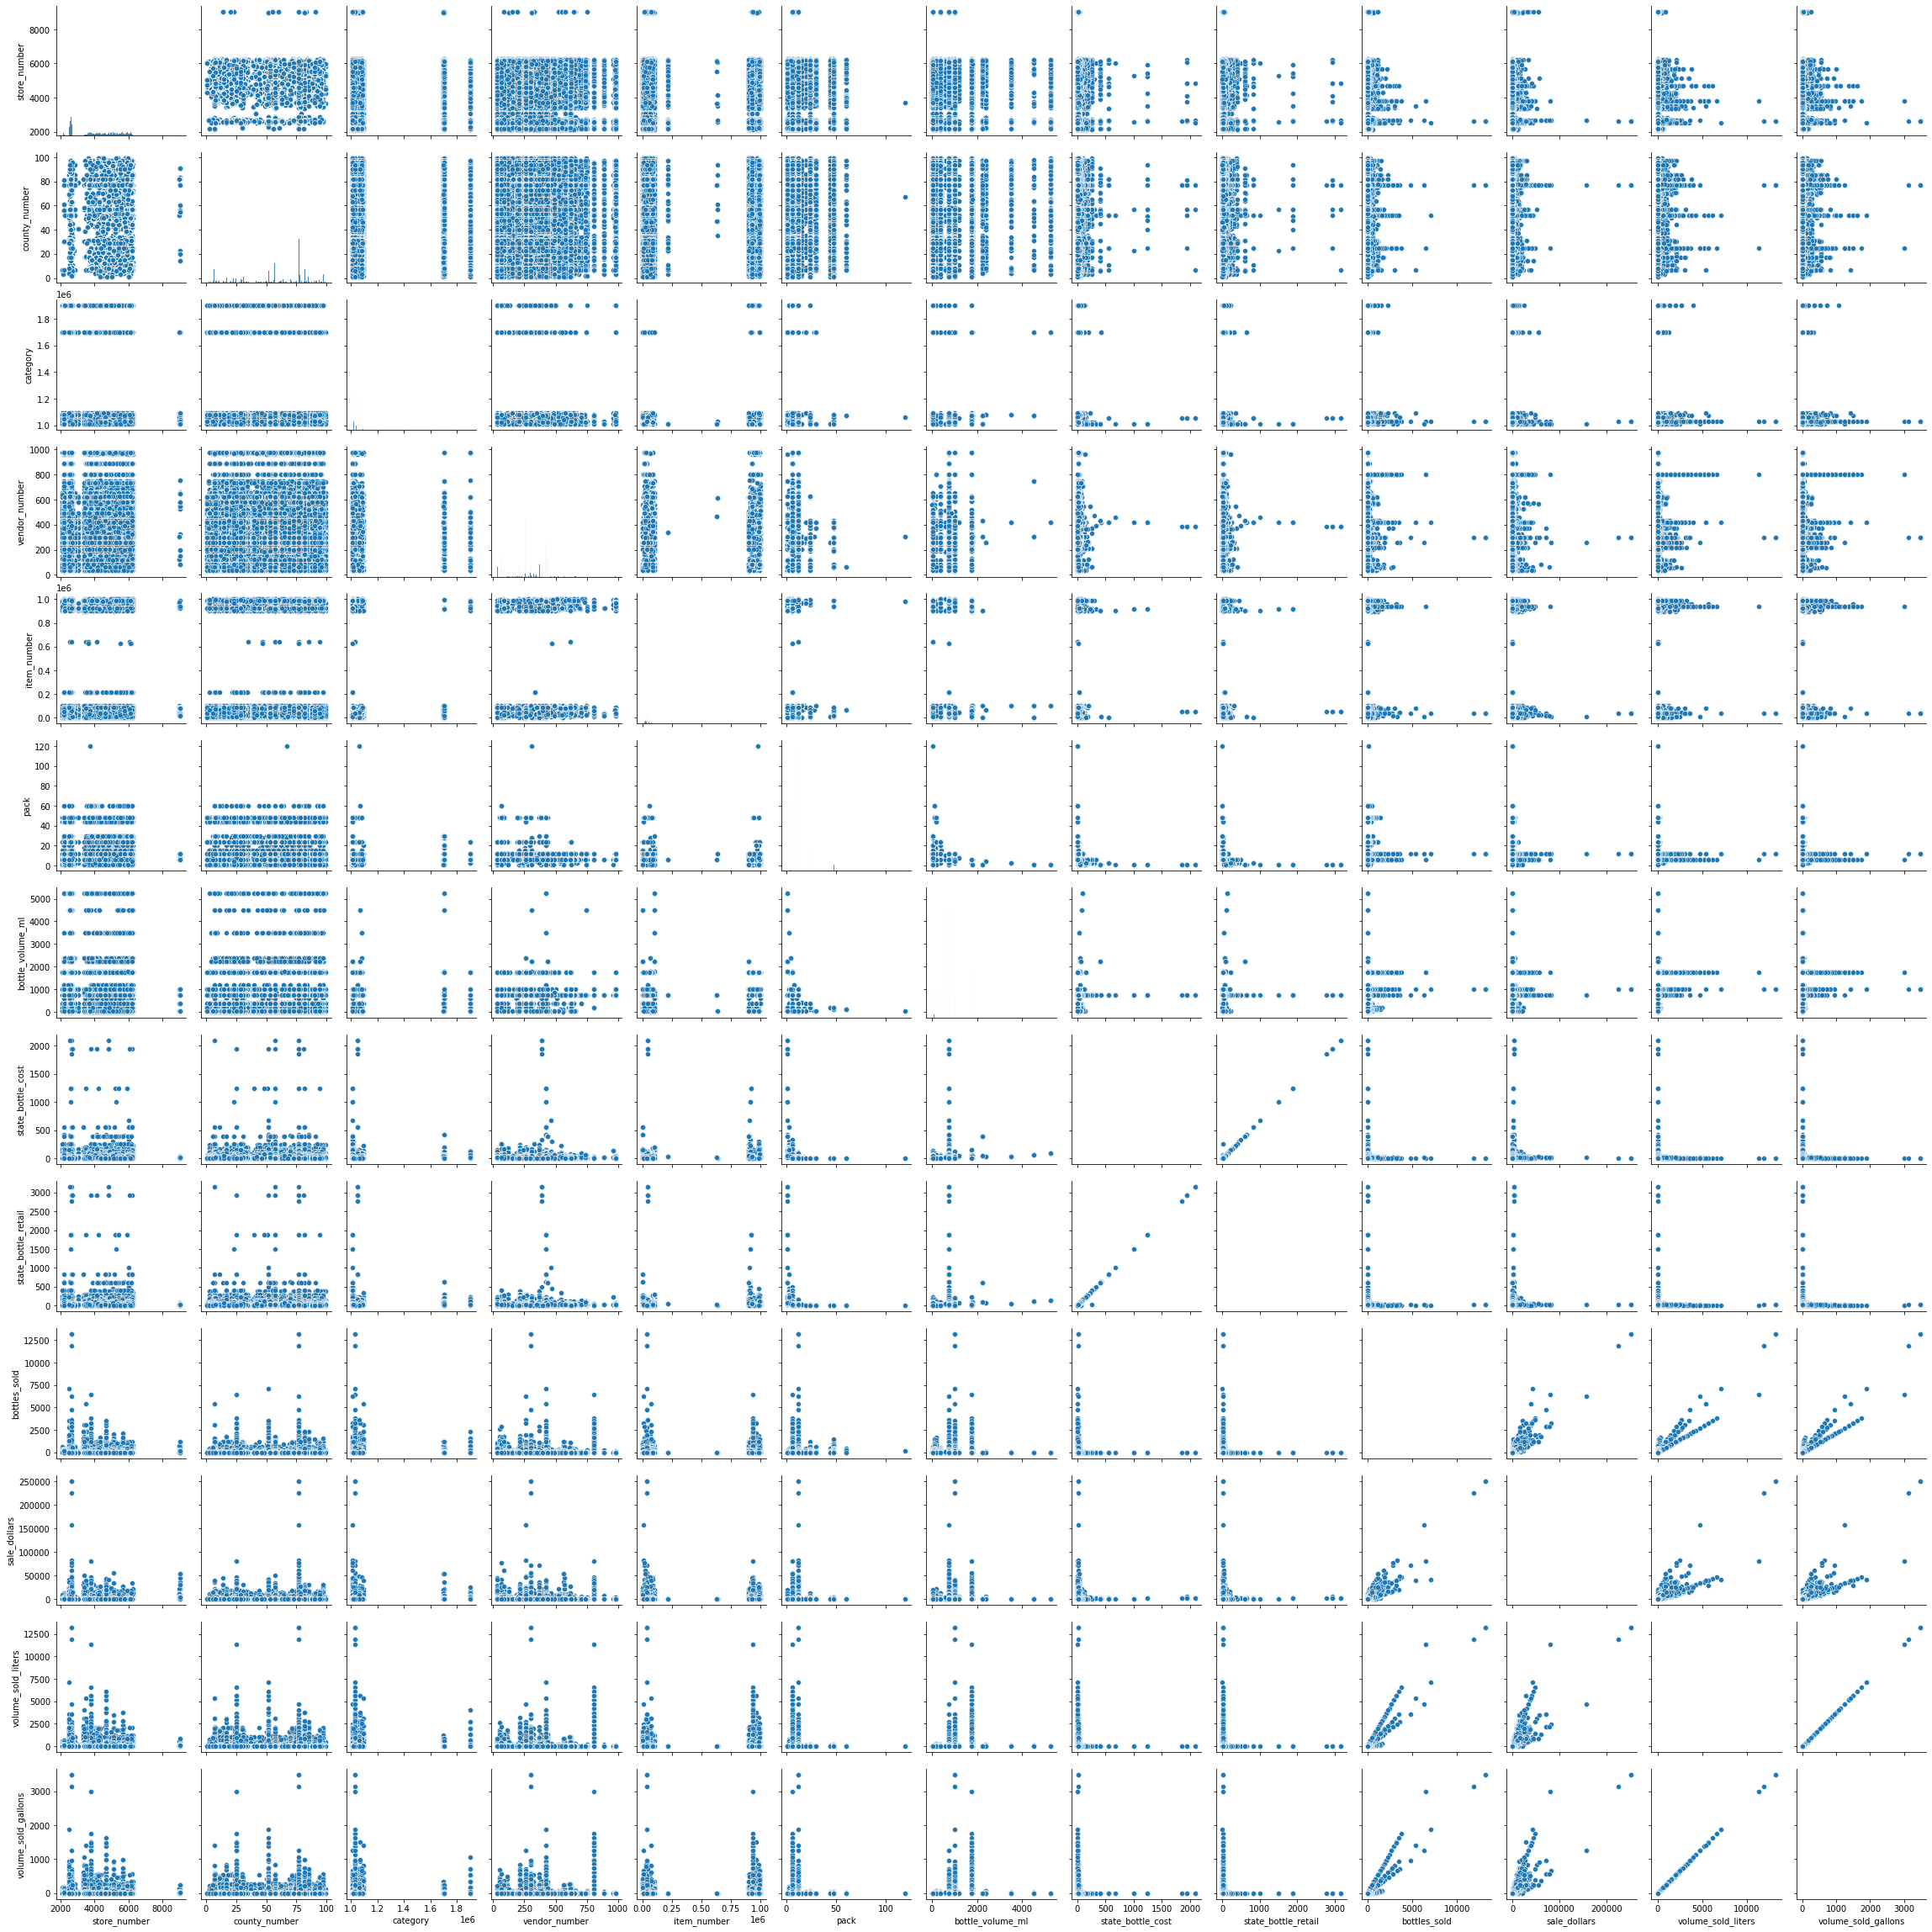

In [100]:
sns.pairplot(df2).savefig("pairplot.png")
plt.show()

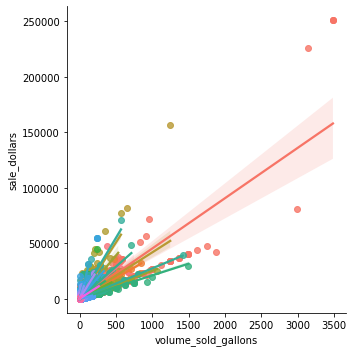

In [101]:
sns.lmplot(x="volume_sold_gallons", y="sale_dollars", hue="category_name", legend=False, data=df2).savefig("sales_gallons.png")
plt.show()


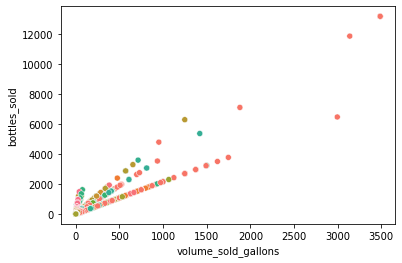

In [102]:
sns.scatterplot(x="volume_sold_gallons", y="bottles_sold", hue="category_name", legend=False, data=df2).figure.savefig("gallons_bottles_sold.png")
plt.show()

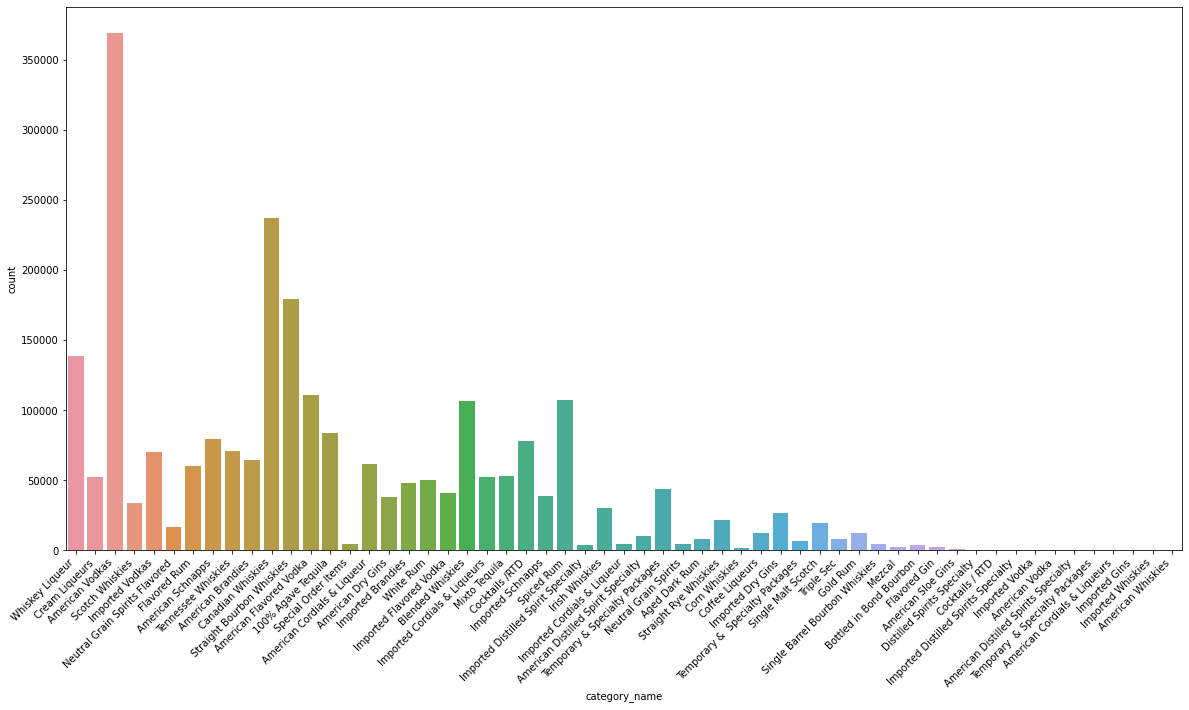

In [103]:
plt.figure(figsize=(20, 10))

countplot = sns.countplot(x="category_name", data=df2)

countplot.set_xticklabels(
    countplot.get_xticklabels(), 
    rotation=45,
    horizontalalignment="right",
    fontweight="light",
    fontsize="10"
)
countplot.figure.savefig("category_count.png")

plt.show()


In [104]:
# Split date for heatmap usage
df2["sale_year"] = df2["date"].apply(lambda x: x.year)
df2["sale_month"] = df2["date"].apply(lambda x: x.month)
df2["sale_weekday"] = df2["date"].apply(lambda x: x.weekday())

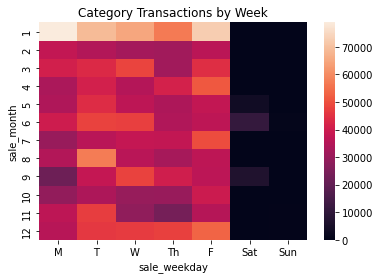

In [161]:
plt.title("Category Transactions by Week")

heatmap = sns.heatmap(
    df2.pivot_table(
        index="sale_month",
        columns="sale_weekday",
        values="category",
        aggfunc="size",
        # aggfunc=lambda x: x.nunique(),
        fill_value=0
    )
)
heatmap.set_xticklabels(["M", "T", "W", "Th", "F", "Sat", "Sun"])
heatmap.figure.savefig("category_heatmap.png")


plt.show()

In [159]:
df2["sale_weekday"].value_counts()

1    537091
4    529759
2    490573
0    452405
3    441193
5     21142
6      2805
Name: sale_weekday, dtype: int64

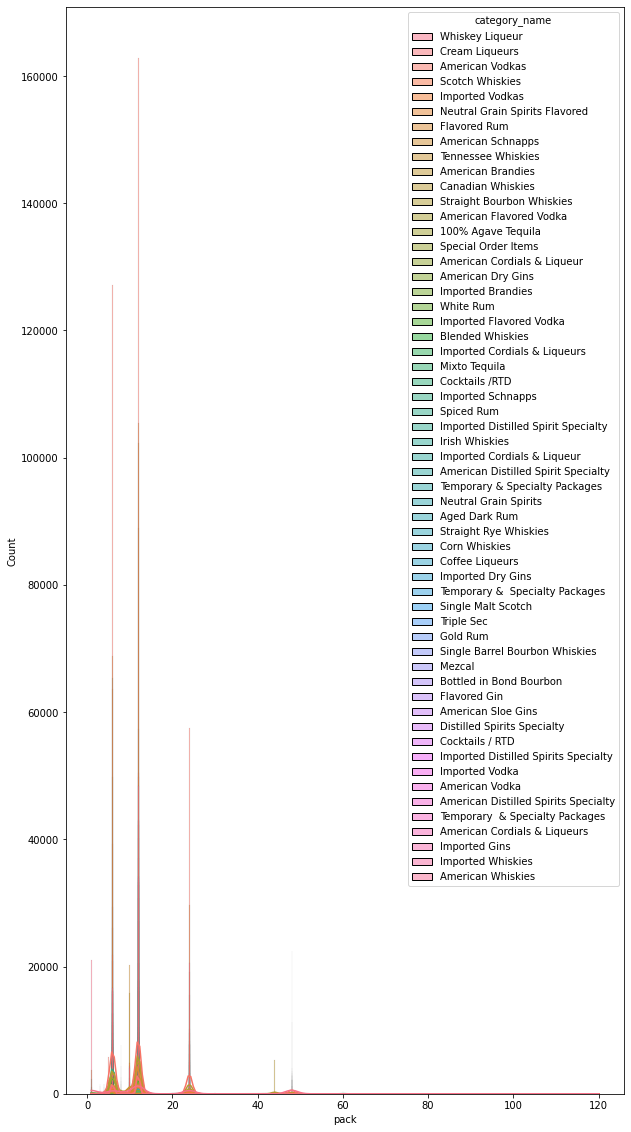

In [145]:
plt.figure(figsize=(10, 20))

sns.histplot(
    data=df2,
    x="pack",
    hue="category_name",
    stat="count",
    kde=True
)

plt.show()

In [149]:
df2["pack"].value_counts().sort_index()
# df2["pack"].value_counts().sort_values()

1        30594
2            2
3         4926
4         5922
5         9882
6       761133
8        20253
9          395
10       58746
12     1288254
15         380
16           6
18          13
20         170
24      225535
28          28
30         261
44        5254
48       62719
60         493
120          2
Name: pack, dtype: int64